In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.applications import DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
# Define the path to your dataset file
dataset_file_path = '/content/drive/MyDrive/CV/CV_Project_Detection.v4i.yolokeras/train/_annotations.txt'

# Open the dataset file
with open(dataset_file_path, 'r') as file:
    # Read each line in the file
    for line in file:
        # Split the line into parts
        parts = line.strip().split(' ')

        # The first part is the image filename
        image_filename = parts[0]

        # The remaining parts are the bounding box coordinates and class labels
        # Each bounding box and class label pair is separated by a space
        bounding_boxes_and_labels = parts[1:]

        # Process each bounding box and class label pair
        for bbox_label in bounding_boxes_and_labels:
            # Split the bounding box and class label pair
            bbox, label = bbox_label.rsplit(',', 1)
            # The bounding box coordinates are everything before the last element
            bbox_coordinates = bbox.split(',')
            # Convert the class label to an integer
            label = int(label)

            # Print the image filename, bounding box coordinates, and class label
            print(f"Image: {image_filename}")
            print(f"Bounding Box: {bbox_coordinates}")
            print(f"Class Label: {label}")
            print()

        # Break the loop after processing the first line
        break


Image: frame202_aug4_aug1_jpg.rf.7f11a22bc6e73b67d379c09c3da93bc5.jpg
Bounding Box: ['209', '129', '254', '328']
Class Label: 0

Image: frame202_aug4_aug1_jpg.rf.7f11a22bc6e73b67d379c09c3da93bc5.jpg
Bounding Box: ['208', '160', '252', '328']
Class Label: 3



In [ ]:
# Define the path to your dataset file
dataset_file_path = '/content/drive/MyDrive/CV/CV_Project_Detection.v4i.yolokeras/train/_annotations.txt'

# Initialize an empty dictionary to store the structured data
structured_data = {}

# Open the dataset file
with open(dataset_file_path, 'r') as file:
    # Read each line in the file
    for line in file:
        # Split the line into parts
        parts = line.strip().split(' ')

        # The first part is the image filename
        image_filename = parts[0]

        # The remaining parts are the bounding box coordinates and class labels
        # Each bounding box and class label pair is separated by a space
        bounding_boxes_and_labels = parts[1:]

        # Initialize an empty list for the current image's labels
        if image_filename not in structured_data:
            structured_data[image_filename] = []

        # Process each bounding box and class label pair
        for bbox_label in bounding_boxes_and_labels:
            # Split the bounding box and class label pair
            bbox, label = bbox_label.rsplit(',', 1)
            # The bounding box coordinates are everything before the last element
            bbox_coordinates = bbox.split(',')
            # Convert the class label to an integer
            label = int(label)

            # Add the label to the current image's list of labels
            structured_data[image_filename].append(label)

# Determine the number of classes
num_classes = max(max(labels) for labels in structured_data.values()) + 1

# Convert the structured data to a binary matrix for multi-label classification
train_class_labels = []
for labels in structured_data.values():
    label_vector = [0] * num_classes
    for label in labels:
        label_vector[label] = 1
    train_class_labels.append(label_vector)

# Extract image filenames from structured_data
train_image_filenames = list(structured_data.keys())

# Print class labels
print(train_class_labels)

# Print the structured data
# for entry in structured_data:
#     print(entry)

# Print image filenames
print("Image Filenames:", train_image_filenames)
print()

# Print bounding boxes
# Since bounding boxes are not directly used in the binary matrix representation,
# you might want to handle them separately or adjust the code to include them in your model's input.



[[1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0], [0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0], [1, 0, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0], [0, 1, 0, 0, 1, 0],

In [ ]:
# Define the path to your validation dataset file
valid_dataset_file_path = '/content/drive/MyDrive/CV/CV_Project_Detection.v4i.yolokeras/valid/_annotations.txt'

# Initialize an empty dictionary to store the structured data for validation
valid_structured_data = {}

# Open the validation dataset file
with open(valid_dataset_file_path, 'r') as file:
    # Read each line in the file
    for line in file:
        # Split the line into parts
        parts = line.strip().split(' ')

        # The first part is the image filename
        image_filename = parts[0]

        # The remaining parts are the bounding box coordinates and class labels
        # Each bounding box and class label pair is separated by a space
        bounding_boxes_and_labels = parts[1:]

        # Initialize an empty list for the current image's labels
        if image_filename not in valid_structured_data:
            valid_structured_data[image_filename] = []

        # Process each bounding box and class label pair
        for bbox_label in bounding_boxes_and_labels:
            # Split the bounding box and class label pair
            bbox, label = bbox_label.rsplit(',', 1)
            # The bounding box coordinates are everything before the last element
            bbox_coordinates = bbox.split(',')
            # Convert the class label to an integer
            label = int(label)

            # Add the label to the current image's list of labels
            valid_structured_data[image_filename].append(label)

# Determine the number of classes
num_classes = max(max(labels) for labels in valid_structured_data.values()) + 1

# Convert the structured data to a binary matrix for multi-label classification
valid_class_labels = []
for labels in valid_structured_data.values():
    label_vector = [0] * num_classes
    for label in labels:
        label_vector[label] = 1
    valid_class_labels.append(label_vector)

# Extract image filenames from structured_data
valid_image_filenames = list(valid_structured_data.keys())

# Print class labels
print("Validation Class Labels:", valid_class_labels)

# Print the structured data
# for entry in valid_structured_data:
#     print(entry)

# Print image filenames
print("Validation Image Filenames:", valid_image_filenames)
print()

# Print bounding boxes
# Since bounding boxes are not directly used in the binary matrix representation,
# you might want to handle them separately or adjust the code to include them in your model's input.


Validation Class Labels: [[0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0], [0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0], [0, 1, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1], [0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1], [0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1], [0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0

Epoch 1/100
12/12 [==============================] - 156s 3s/step - loss: 1.3071 - accuracy: 0.1260 - val_loss: 37573448516973755097825509805916160.0000 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/100
12/12 [==============================] - 7s 573ms/step - loss: 0.9108 - accuracy: 0.2598 - val_loss: 109158445926589686349824.0000 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/100
12/12 [==============================] - 7s 568ms/step - loss: 0.8260 - accuracy: 0.2625 - val_loss: 33562420639170560.0000 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/100
12/12 [==============================] - 7s 576ms/step - loss: 0.7065 - accuracy: 0.2572 - val_loss: 10245428477952.0000 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 5/100
12/12 [==============================] - 7s 585ms/step - loss: 0.8174 - accuracy: 0.2231 - val_loss: 3304927789056.0000 - val_accuracy: 0.3761 - lr: 0.0100
Epoch 6/100
12/12 [==============================] - 7s 579ms/step - loss: 0.8905 - accuracy: 0.1995 - val_

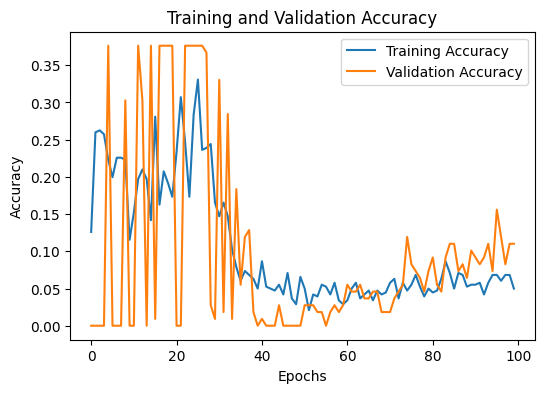

In [ ]:
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Directory where the images are stored
train_image_directory = '/content/drive/MyDrive/CV/CV_Project_Detection.v4i.yolokeras/train'
valid_image_directory = '/content/drive/MyDrive/CV/CV_Project_Detection.v4i.yolokeras/valid'

# Prepare the data for model input
train_features = []
train_labels = []
valid_features = []
valid_labels = []

for image_filename in train_image_filenames:
    image_path = os.path.join(train_image_directory, image_filename)
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img / 255.0 # Normalize pixel values
    train_features.append(img)
    label = train_class_labels[train_image_filenames.index(image_filename)]
    train_labels.append(label)

for image_filename in valid_image_filenames:
    image_path = os.path.join(valid_image_directory, image_filename)
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img / 255.0 # Normalize pixel values
    valid_features.append(img)
    label = valid_class_labels[valid_image_filenames.index(image_filename)]
    valid_labels.append(label)

# Convert features to a numpy array
train_features = np.array(train_features)
valid_features = np.array(valid_features)

# Convert labels to a numpy array of the correct shape
num_classes = 6 # Assuming you have 6 classes
train_labels = np.array(train_class_labels)
valid_labels = np.array(valid_class_labels)


x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer with dropout for regularization
x = Dense(2048, activation='relu')(x) # Increased neurons
x = BatchNormalization()(x) # Added Batch Normalization
x = Dropout(0.5)(x)

# Add another fully-connected layer
x = Dense(1024, activation='relu')(x) # Increased neurons
x = BatchNormalization()(x) # Added Batch Normalization
x = Dropout(0.5)(x)

# Add the output layer
num_classes = 6 # Assuming you have 6 classes
predictions = Dense(num_classes, activation='sigmoid')(x) # Use sigmoid activation for multi-label classification

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy']) # Use binary_crossentropy for multi-label classification


from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Add the learning rate scheduler to the callbacks list when fitting the model
history = model.fit(train_features, train_labels, epochs=100, batch_size=32, validation_data=(valid_features, valid_labels), callbacks=[reduce_lr])



# Fine-tuning the model on the training dataset
# history = model.fit(train_features, train_labels, epochs=15, batch_size=32, validation_data=(valid_features, valid_labels))

# Plotting the training accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Define the path to your test dataset file
test_dataset_file_path = '/content/drive/MyDrive/CV/CV_Project_Detection.v4i.yolokeras/test/_annotations.txt'

# Initialize an empty dictionary to store the structured data for the test dataset
test_structured_data = {}

# Open the test dataset file
with open(test_dataset_file_path, 'r') as file:
    # Read each line in the file
    for line in file:
        # Split the line into parts
        parts = line.strip().split(' ')

        # The first part is the image filename
        image_filename = parts[0]

        # The remaining parts are the bounding box coordinates and class labels
        # Each bounding box and class label pair is separated by a space
        bounding_boxes_and_labels = parts[1:]

        # Initialize an empty list for the current image's labels
        if image_filename not in test_structured_data:
            test_structured_data[image_filename] = []

        # Process each bounding box and class label pair
        for bbox_label in bounding_boxes_and_labels:
            # Split the bounding box and class label pair
            bbox, label = bbox_label.rsplit(',', 1)
            # The bounding box coordinates are everything before the last element
            bbox_coordinates = bbox.split(',')
            # Convert the class label to an integer
            label = int(label)

            # Add the label to the current image's list of labels
            test_structured_data[image_filename].append(label)

# Determine the number of classes
num_classes = max(max(labels) for labels in test_structured_data.values()) + 1

# Convert the structured data to a binary matrix for multi-label classification
test_class_labels = []
for labels in test_structured_data.values():
    label_vector = [0] * num_classes
    for label in labels:
        label_vector[label] = 1
    test_class_labels.append(label_vector)

# Extract image filenames from structured_data
test_image_filenames = list(test_structured_data.keys())

# Print class labels
print("Test Class Labels:", test_class_labels)

# Print the structured data
# for entry in test_structured_data:
#     print(entry)

# Print image filenames
print("Test Image Filenames:", test_image_filenames)


Test Class Labels: [[0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0], 

2/2 [==============================] - 6s 6s/step - loss: 0.2467 - accuracy: 0.0556
Test Loss: 0.2467
Test Accuracy: 0.0556


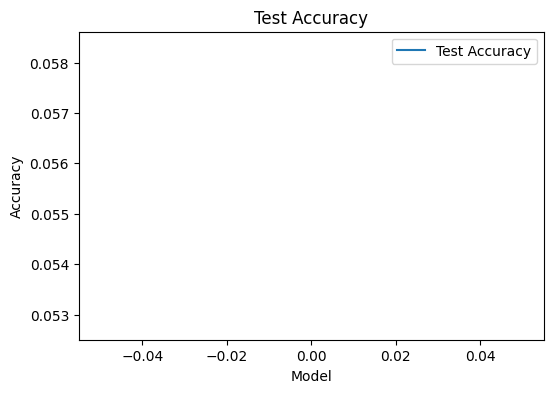

In [ ]:
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Directory where the test images are stored
test_image_directory = '/content/drive/MyDrive/CV/CV_Project_Detection.v4i.yolokeras/test'

# Prepare the data for model input
test_features = []

for image_filename in test_image_filenames:
    image_path = os.path.join(test_image_directory, image_filename)
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img / 255.0 # Normalize pixel values
    test_features.append(img)

# Convert features to a numpy array
test_features = np.array(test_features)

# Assuming you have the true labels for the test dataset in a variable named test_true_labels
# Convert the true labels to a numpy array of the correct shape
num_classes = 6 # Assuming you have 6 classes
test_true_labels = np.array(test_class_labels)
# Use model.evaluate to calculate the loss and accuracy on the test dataset
loss, accuracy = model.evaluate(test_features, test_true_labels, verbose=1)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plotting the test accuracy
plt.figure(figsize=(6, 4))
plt.plot([accuracy], label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import numpy as np
# import matplotlib.pyplot as plt

# # Create a mapping dictionary from image filenames to their true class labels
# image_name_to_true_labels = {
#     'frame55_jpg.rf.3f537b8a568f6753c3d0408e94c64cdc.jpg': [0, 1, 0, 0, 0, 1],
#     'frame127_jpg.rf.e77e19065c141a55db93ed2240486ae3.jpg': [1, 0, 0, 0, 0, 1],
#     'frame188_jpg.rf.25c275206764dd91b524de5563b72b7d.jpg': [0, 1, 0, 0, 0, 1],
#     'frame10_jpg.rf.b228190a0296632eb2c441b39c5c0984.jpg': [0, 1, 0, 0, 0, 1],
#     'frame15_jpg.rf.8dba0d3d5421cacae7a4c13e9732602f.jpg': [0, 1, 0, 0, 1, 0],
#     'frame173_jpg.rf.5a8ef0e5f5fa30aab175ce4f357bcbce.jpg': [0, 1, 0, 0, 0, 1],
#     'frame5_jpg.rf.0413e2e93204da1fe60f57ee97a4d9a0.jpg': [0, 1, 0, 0, 0, 1],
#     'frame183_jpg.rf.14041ec0f31583ca750a56d2a958bf13.jpg': [0, 1, 0, 0, 0, 1],
#     'frame91_jpg.rf.511cd6255d42ed05e8d2ea0518bbf6f1.jpg': [0, 1, 0, 0, 0, 1],
#     'frame66_jpg.rf.768fd406c6dc64427756ddc577acb3fa.jpg': [0, 1, 0, 0, 0, 1],
#     'frame161_jpg.rf.aea6566eb79223b455502b3cd56e8a94.jpg': [0, 1, 0, 0, 0, 1],
#     'frame9_jpg.rf.4b7281f9d47b80718058549d4011c869.jpg': [0, 1, 0, 0, 0, 1],
#     'frame7_jpg.rf.d349ec79af51f85a9a71d722794bc799.jpg': [0, 1, 0, 0, 0, 1],
#     'frame4_jpg.rf.e2133f8ddd46c0e609c799c125920986.jpg': [0, 1, 0, 0, 0, 1],
#     'frame11_jpg.rf.295c38e121fbb79a604202b0b5f51c8c.jpg': [0, 1, 0, 0, 0, 1],
#     'frame165_jpg.rf.c85023d914fbb855aeb09c4d455ec196.jpg': [0, 1, 0, 0, 0, 1],
#     'frame75_jpg.rf.4740d1bb0fd9d46bd8084e25868a1cc8.jpg': [0, 1, 0, 0, 0, 1],
#     'frame16_jpg.rf.37b926571a7d718f679e225a6e4e67d7.jpg': [0, 1, 0, 0, 0, 1],
#     'frame108_jpg.rf.6e6d2e4fee62cfc93280d8a0c720dcea.jpg': [0, 1, 0, 0, 0, 1],
#     'frame76_jpg.rf.0a0b3e5cff4041ff6a2087871d1d7a51.jpg': [0, 1, 0, 0, 0, 1],
#     'frame186_jpg.rf.d39b1468839e269bf87b2d3874050976.jpg': [0, 1, 0, 0, 0, 1]
# }

# # Function to load and preprocess an image
# def load_and_preprocess_image(image_path):
#     img = load_img(image_path, target_size=(224, 224))
#     img = img_to_array(img)
#     img = img / 255.0 # Normalize pixel values
#     return np.expand_dims(img, axis=0) # Expand dimensions to match the model's expected input shape

# # Function to predict the class labels for an image
# def predict_class_labels(model, image_path, image_name_to_true_labels):
#     # Load and preprocess the image
#     preprocessed_image = load_and_preprocess_image(image_path)

#     # Make a prediction
#     probabilities = model.predict(preprocessed_image)

#     # Convert probabilities to binary labels by thresholding at 0.5
#     binary_labels = (probabilities > 0.5).astype(int)

#     # Fetch the true labels for the given image
#     true_labels = image_name_to_true_labels.get(image_path.split('/')[-1], None)
#     if true_labels is not None:
#         true_labels = np.array([int(label) for label in true_labels])

#     return binary_labels, true_labels

# # Example usage
# image_path = '/content/drive/MyDrive/CV/CV_Project_Detection.v4i.yolokeras/test/frame15_jpg.rf.8dba0d3d5421cacae7a4c13e9732602f.jpg' # Replace with the path to your image
# predicted_labels, true_labels = predict_class_labels(model, image_path, image_name_to_true_labels)

# # Print the predicted labels
# print("Predicted Labels:", predicted_labels)

# # Print the true labels if available
# if true_labels is not None:
#     print("True Labels:", true_labels)

# # If you want to visualize the image
# img = load_img(image_path, target_size=(224, 224))
# plt.imshow(img)
# plt.show()
